In [1]:
import pandas as pd

1. drinks.csv 파일 로드 
2. 결측치 확인
3. continent 컬럼에 결측치 존재 -> 결측치는 'OT' 변경
4. continent별 spirit_servings 컬럼의 평균, 최소, 최대, 합을 출력
5. 이 데이터를 바형 그래프 출력
6. total_liters_of_pure_alcohol 컬럼의 평균보다 높은 continent가 어디인지 

In [2]:
drinks = pd.read_csv("../csv/drinks.csv")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [3]:
# 결측치 확인 
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [4]:
# case 1
drinks["continent"] = drinks["continent"].fillna('OT')

# case 2
# drinks = drinks.fillna('OT')

In [5]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [10]:
## 대륙별 spirit 소비량의 평균 합계 최소 최대값 출력
result = drinks.groupby("continent").agg(
    ["mean", "sum", "min", "max"])['spirit_servings']
result

,mean,sum,min,max
continent,,,,
AF,16.339623,866,0,152
AS,60.840909,2677,0,326
EU,132.555556,5965,0,373
OC,58.437500,935,0,254
OT,165.739130,3812,68,438
SA,114.750000,1377,25,302


In [28]:
## 시각화 바 그래프로 표시
## plt.bar(x, y)
## x -> 그룹화 기준 continent
## y -> 평균, 합계, 최소, 최대
## 총 4개의 그래프를 subplot

means = result["mean"]
min = result["min"]
max = result["max"]
sum = result["sum"]

x = result.index
x

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

In [12]:
import matplotlib.pyplot as plt

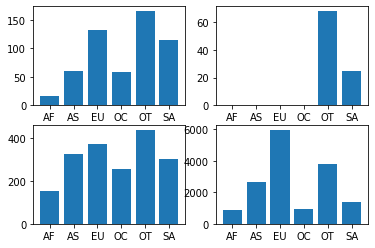

In [13]:
## subplot(행의 수, 열의 수, 위치)
## 4개의 그래프 행의 수 * 열의 수 = 4
plt.subplot(2, 2, 1)
plt.bar(x, means)
plt.subplot(2, 2, 2)
plt.bar(x, min)
plt.subplot(2, 2, 3)
plt.bar(x, max)
plt.subplot(2, 2, 4)
plt.bar(x, sum)
plt.show()

In [14]:
## 전체 데이터의 술 소비량 평균

total_mean = drinks["total_litres_of_pure_alcohol"].mean()
total_mean

4.717098445595855

In [ ]:
## 대륙 별 술소비량의 평균
mean_continent = drinks.groupby("continent").mean()["total_litres_of_pure_alcohol"]
mean_continent

In [ ]:
mean_continent[mean_continent >= total_mean]

In [21]:
import numpy as np

In [ ]:
cnt = len(x)
cnt

In [ ]:
index = np.arange(cnt)
index

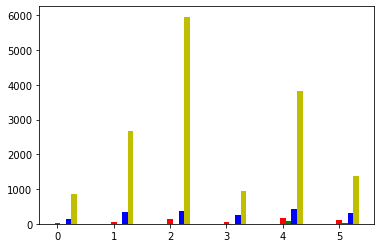

In [27]:
bar_width = 0.1

plt.bar(index, means, bar_width, color='r')
plt.bar(index+bar_width, min, bar_width, color='g')
plt.bar(index+bar_width*2, max, bar_width, color='b')
plt.bar(index+bar_width*3, sum, bar_width,color='y')

plt.show()